<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/6_Serie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de ingresos
## Serie Temporal ARIMA

ARIMA es un acrónimo de AutoRegressive Integrated Moving Average. Es una clase de modelo que captura un conjunto de diferentes estructuras temporales estándar en datos de series de tiempo.
Atiende a un conjunto de estructuras estándar en datos de series de tiempo y proporciona un método simple para realizar pronósticos de series de tiempo hábiles.
 los aspectos clave del modelo son:

•	AR : autorregresión . Un modelo que usa la relación dependiente entre una observación y cierto número de observaciones retrasadas 

•	I : Integrado . El uso de la diferenciación de observaciones en bruto para hacer estacionaria la serie de tiempo.

•	MA : Media móvil . Un modelo que utiliza la dependencia entre una observación y un error residual de un modelo de promedio móvil aplicado a observaciones retrasadas.

ARIMA(p,d,q)  tiene tres parámetros relacionados con los aspectos claves del modelo y son: 
1.	p : El número de observaciones de retraso incluidas en el modelo, también llamado orden de retraso.
2.	d : El número de veces que se diferencian las observaciones sin procesar, también llamado grado de diferenciación.
3.	q : El tamaño de la ventana de media móvil, también llamado orden de media móvil.
Se construye un modelo de regresión lineal que incluye el número y tipo de términos especificados, y los datos se preparan mediante un grado de diferenciación para hacerlos estacionarios, es decir, eliminar las estructuras de tendencia y estacionales que afectan negativamente al modelo de regresión.


Descargaremos el dataset que esta dividido en dos partes, para posteriormente concatanarlo y trabajar sobre él.

In [1]:
# Primero debemos descargar las librerias que sabemos que vamos a utulizar, aunque posteriormente descargaremos otras.
%pylab inline
import itertools
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Descargamos el dataset desde la plataforma github
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv

--2021-07-09 11:43:01--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17889332 (17M) [text/plain]
Saving to: ‘Table1.csv’

Table1.csv          100%[===================>]  17.06M  38.0MB/s    in 0.4s    

2021-07-09 11:43:03 (38.0 MB/s) - ‘Table1.csv’ saved [17889332/17889332]



In [3]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv

--2021-07-09 11:43:03--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17784301 (17M) [text/plain]
Saving to: ‘Table2.csv’

Table2.csv          100%[===================>]  16.96M  38.5MB/s    in 0.4s    

2021-07-09 11:43:04 (38.5 MB/s) - ‘Table2.csv’ saved [17784301/17784301]



In [4]:
#Es necesario convertir los dos dataset en Pandas DataFrame para poder trabajar sobre ellos
df1 = pd.read_csv('/content/Table1.csv')
df1

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,285947,561967,22400,other,3,2011-08-01 13:11:00,0.39,12844.0,United Kingdom,1.17
199996,199996,285948,561967,82482,WOODEN PICTURE FRAME WHITE FINISH,5,2011-08-01 13:11:00,2.55,12844.0,United Kingdom,12.75
199997,199997,285949,561967,82551,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
199998,199998,285950,561967,82552,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35


In [5]:
df2 = pd.read_csv('/content/Table2.csv')
df2

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,200000,285952,561967,23306,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
1,200001,285953,561967,47504H,other,1,2011-08-01 13:11:00,0.79,12844.0,United Kingdom,0.79
2,200002,285954,561967,21907,other,6,2011-08-01 13:11:00,2.10,12844.0,United Kingdom,12.60
3,200003,285955,561967,21992,other,3,2011-08-01 13:11:00,1.25,12844.0,United Kingdom,3.75
4,200004,285956,561967,21754,other,2,2011-08-01 13:11:00,5.95,12844.0,United Kingdom,11.90
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [6]:
# Concatenamos nuestos dos Dataframe para conseguir el dataset completo 
df = pd.concat([df1,df2], axis=0)
df

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
#borramos las columnas erroneas que no pertenecen al data set inicial
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [8]:
df = df.reset_index(drop=True)

In [9]:
#Vamos a crear un data set solo con los ingresos y la fecha. En este caso no nos interesan quien gasto dinero ni en que objetos
TSdf= df[['PrecioTotal','InvoiceDate']]
TSdf

,PrecioTotal,InvoiceDate
0,15.30,2010-12-01 08:26:00
1,20.34,2010-12-01 08:26:00
2,22.00,2010-12-01 08:26:00
3,20.34,2010-12-01 08:26:00
4,20.34,2010-12-01 08:26:00
...,...,...
397919,10.20,2011-12-09 12:50:00
397920,12.60,2011-12-09 12:50:00
397921,16.60,2011-12-09 12:50:00
397922,16.60,2011-12-09 12:50:00


Vamos a quedarnos solamente con el dia de la compra y agruparemos todas las compras hechas ese dia.

In [10]:
#Convertimos la columna InvoiceDate en una columna con objetos tipo datetime.date
TSdf['InvoiceDate'] = pd.to_datetime(TSdf['InvoiceDate'])
TSdf["hour"]=TSdf["InvoiceDate"].dt.strftime("%d/%m/%Y %H")
TSdf["day"]=TSdf["InvoiceDate"].dt.date
TSdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,PrecioTotal,InvoiceDate,hour,day
0,15.30,2010-12-01 08:26:00,01/12/2010 08,2010-12-01
1,20.34,2010-12-01 08:26:00,01/12/2010 08,2010-12-01
2,22.00,2010-12-01 08:26:00,01/12/2010 08,2010-12-01
3,20.34,2010-12-01 08:26:00,01/12/2010 08,2010-12-01
4,20.34,2010-12-01 08:26:00,01/12/2010 08,2010-12-01
...,...,...,...,...
397919,10.20,2011-12-09 12:50:00,09/12/2011 12,2011-12-09
397920,12.60,2011-12-09 12:50:00,09/12/2011 12,2011-12-09
397921,16.60,2011-12-09 12:50:00,09/12/2011 12,2011-12-09
397922,16.60,2011-12-09 12:50:00,09/12/2011 12,2011-12-09


In [11]:
type(TSdf.iloc[1,3])

datetime.date

In [12]:
#creamos un nuevo datafrema con una columna solo con los dias, eliminando las horas
TSdfd = TSdf[['PrecioTotal','InvoiceDate','day']]

In [13]:
TSdfd= TSdfd.groupby('day').sum().reset_index()
TSdfd

,day,PrecioTotal
0,2010-12-01,46376.49
1,2010-12-02,47316.53
2,2010-12-03,23921.71
3,2010-12-05,31771.60
4,2010-12-06,31215.64
...,...,...
300,2011-12-05,58202.21
301,2011-12-06,46144.04
302,2011-12-07,69354.21
303,2011-12-08,50519.41


In [14]:
type(TSdfd.iloc[1,0])

datetime.date

El metodo ARIMA requiere de una tabla con una solo columna, donde estarán los precios y de un indece con las fechas.

Este indice tiene que estar en un formato Datetime y tener asignado una frecuencia.


In [15]:
#convertimos la columna day de nuevo en un objeto date.time y la utilizaremos como el indice la tabla
TSdfd['day'] = pd.to_datetime(TSdfd['day'])
TSdfd = TSdfd.set_index('day')
TSdfd.index

DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-05',
               '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09',
               '2010-12-10', '2010-12-12',
               ...
               '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
               '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
               '2011-12-08', '2011-12-09'],
              dtype='datetime64[ns]', name='day', length=305, freq=None)

In [16]:
TSdfd

,PrecioTotal
day,
2010-12-01,46376.49
2010-12-02,47316.53
2010-12-03,23921.71
2010-12-05,31771.60
2010-12-06,31215.64
...,...
2011-12-05,58202.21
2011-12-06,46144.04
2011-12-07,69354.21


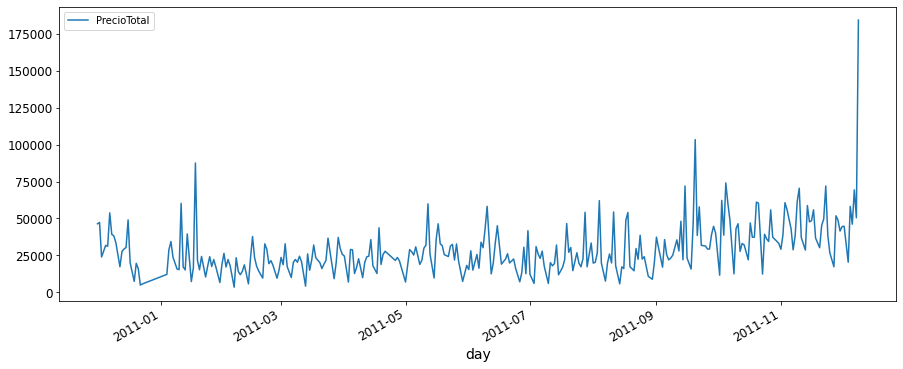

In [17]:
#representamos las ingresos por dia
TSdfd.plot(figsize=(15, 6))
plt.show()

In [18]:
y = TSdfd['PrecioTotal'].resample('1D').sum()
y

day
2010-12-01     46376.49
2010-12-02     47316.53
2010-12-03     23921.71
2010-12-04         0.00
2010-12-05     31771.60
                ...    
2011-12-05     58202.21
2011-12-06     46144.04
2011-12-07     69354.21
2011-12-08     50519.41
2011-12-09    184349.28
Freq: D, Name: PrecioTotal, Length: 374, dtype: float64

La grafica anterior se puede dividir en las diversas partes componen una línea de tiempo que son: la tendencia, la estacionalidad y los valores atípicos o la diferencia entre la primera y la segunda

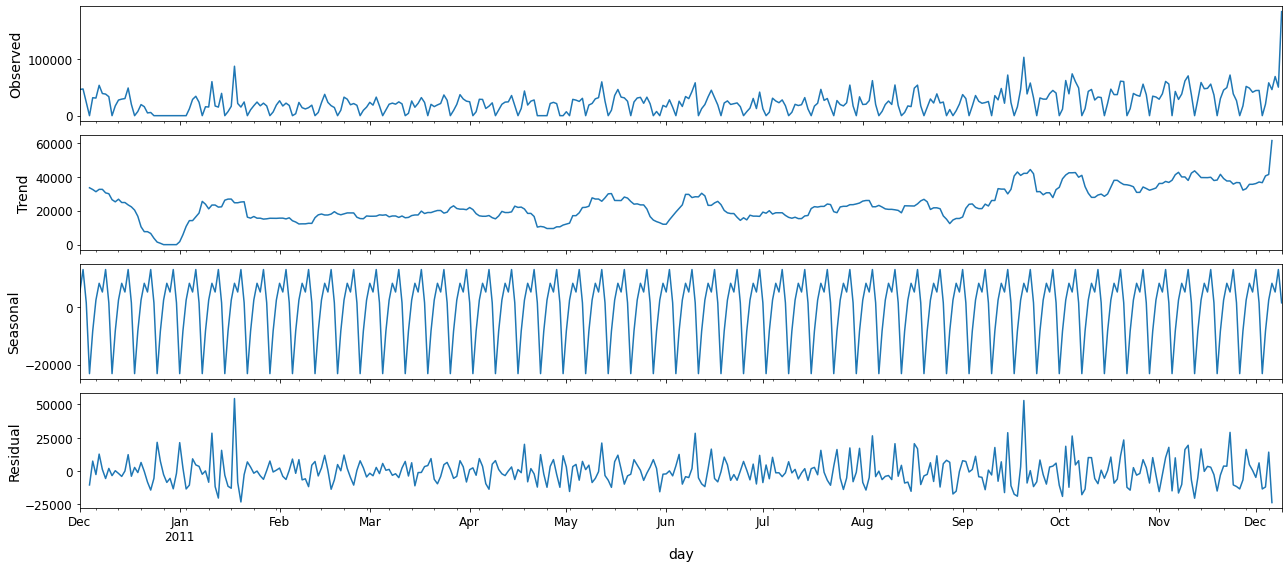

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Vamos a comprobar cuales de los valores de 'p', 'd' y ' q son los mejores para esta sería temporal.

Podemos elegir cualquier número pero este caso, vamos a comprobar que pasaría si solo aplicarámos uno, dos o las tres con valor de 1.

Para ello generamos un loop para las combinaciones de estos tres valores aplicándoles el modelo ARIMA

El metríca AIC nos mostrará el error, así que elegiremos la combinación que tenga un AIC más bajo

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8772.002278497801
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8416.842291455876
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8395.101842863549
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7934.411216630424
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8359.109248798646
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8182.732970328955
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8040.796424001868
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7902.722813768476
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8583.897526164747
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8291.200335494277
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8327.278353806742
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:7899.271095375643
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8321.006557946395
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8216.255788632287
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:7997.8561201192
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7892.620253705831
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8459.143758078948
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8174.532187731495
ARIMA(0, 1, 

In [22]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2172      0.247      0.881      0.378      -0.266       0.700
ma.L1          0.1446      0.250      0.579      0.563      -0.345       0.634
ar.S.L12      -0.2812      0.142     -1.983      0.047      -0.559      -0.003
ma.S.L12      -0.7647      0.084     -9.151      0.000      -0.928      -0.601
sigma2      6.452e+08   1.73e-09   3.73e+17      0.000    6.45e+08    6.45e+08


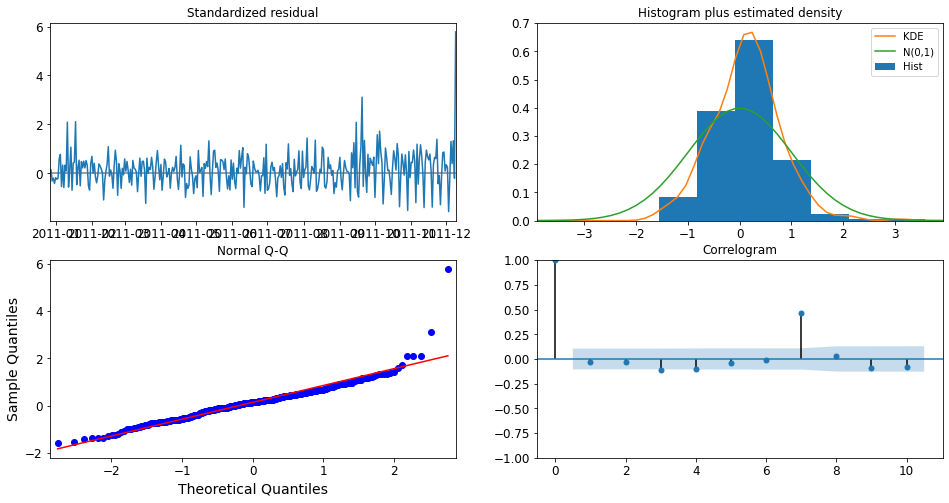

In [23]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

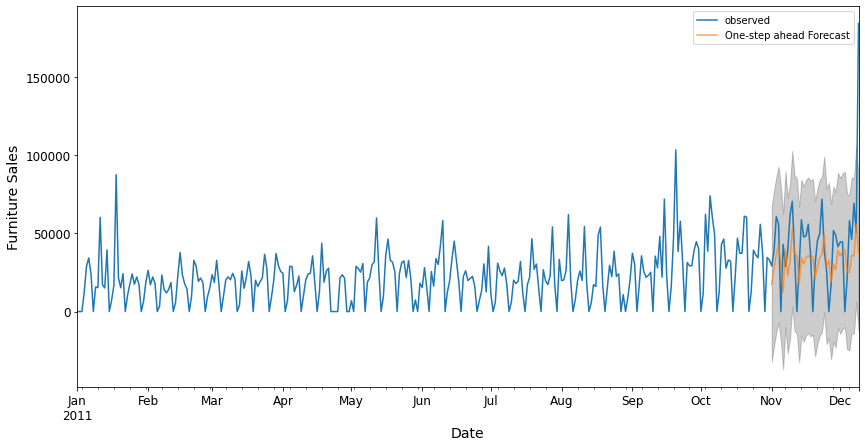

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2011-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## Conclusiones
El método ARIMA es un método muy sencillo de aplicación que nos lleva a obtener buenos resultados fácilmente.

Además, nos permite analizar datos estacionales, cosa que otros métodos no predicción no hacen.

En nuestro caso, los errores residuales de los datos originales y el hecho de que no tenemos datos para todos los días, nos lleva a que los errores de precisión sean considerables en ciertos puntos
